In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline

In [3]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h2>ΟΠΤΙΚΟΠΟΙΗΣΗ ΚΑΙ ΒΑΣΙΚΗ ΕΠΕΞΕΡΓΑΣΙΑ ΧΡΟΝΟΣΕΙΡΩΝ</h2>

<h4>Διάβασμα αρχικών δεδομένων</h4>

In [4]:
data = pd.read_csv('datapoints.csv', header=0)
data.head()

,Time,pwrA,pwrB,pwrC
0,2021-12-19T12:48:03.379000Z,523.103149,303.693207,163.850006
1,2021-12-19T12:49:03.378000Z,530.507996,298.835236,164.227325
2,2021-12-19T12:50:03.377000Z,522.961670,304.117676,165.689423
3,2021-12-19T12:51:03.377000Z,523.952148,309.400116,164.132996
4,2021-12-19T12:52:03.376000Z,523.103149,298.269257,175.122360


In [5]:
#κατάλληλη μετατροπή πεδίου Time σε δεδομένα χρόνου
data['Time'] = pd.to_datetime(data['Time'],format="%Y-%m-%dT%H:%M:%S.%f").dt.tz_convert(tz='EET') #αλλαγή του data type σε datetime
print(data['Time'].dtype)
print(data['pwrA'].dtype)

datetime64[ns, EET]
float64


In [6]:
data.head()

,Time,pwrA,pwrB,pwrC
0,2021-12-19 14:48:03.379000+02:00,523.103149,303.693207,163.850006
1,2021-12-19 14:49:03.378000+02:00,530.507996,298.835236,164.227325
2,2021-12-19 14:50:03.377000+02:00,522.961670,304.117676,165.689423
3,2021-12-19 14:51:03.377000+02:00,523.952148,309.400116,164.132996
4,2021-12-19 14:52:03.376000+02:00,523.103149,298.269257,175.122360


In [7]:
data.describe()

,pwrA,pwrB,pwrC
count,225664.000000,225664.000000,225664.000000
mean,559.116042,466.998363,463.182992
std,29.342136,247.115993,819.286656
min,298.505096,187.620987,62.728989
25%,541.308716,330.011078,133.145813
50%,553.477173,408.445892,138.852737
75%,570.880981,510.604523,233.653687
max,849.954224,3635.875977,4421.639160


<h4>Οπτικοποίηση αρχικών δεδομένων</h4>

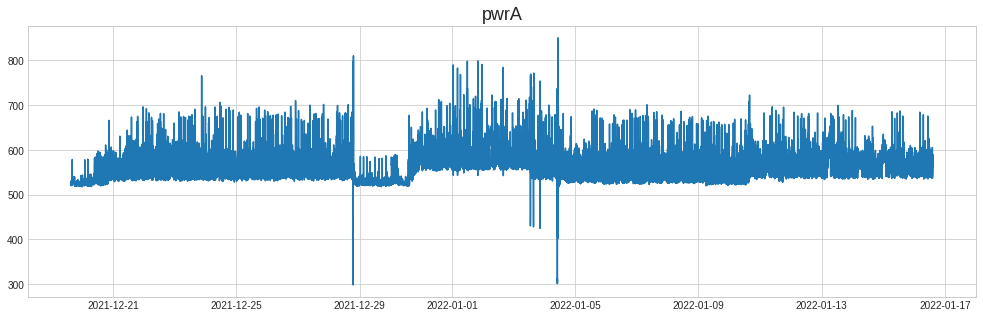

In [8]:
plt.figure(figsize=(17,5))
plt.plot(data['Time'],data['pwrA'])
plt.title('pwrA',fontsize=18)
plt.show()

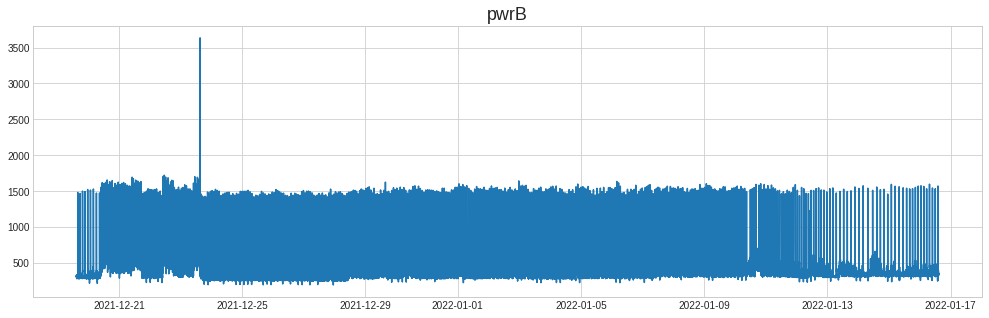

In [9]:
plt.figure(figsize=(17,5))
plt.plot(data['Time'],data['pwrB'])
plt.title('pwrB',fontsize=18)
plt.show()

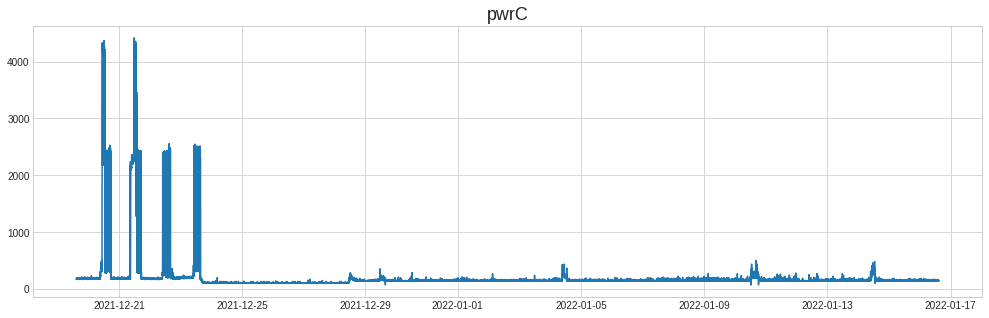

In [10]:
plt.figure(figsize=(17,5))
plt.plot(data['Time'],data['pwrC'])
plt.title('pwrC',fontsize=18)
plt.show()

Παρατήρηση:

Έχουμε διαφορετικό πλήθος μετρήσεων στις δύο μέρες.

In [11]:
data[(data['Time'] >= '2021-12-22 00:00:00.000') & (data['Time'] < '2021-12-23 00:00:00.000')].shape[0]

16905

In [12]:
data[(data['Time'] >= '2021-12-21 00:00:00.000') & (data['Time'] < '2021-12-22 00:00:00.000')].shape[0]

19522

<h4>Παραγωγή τελικού συνόλου δεδομένων</h4>

In [13]:
actual_data = data.resample('H',on='Time').mean()

In [14]:
resampled = data.resample('H',on='Time').mean()
resampled

,pwrA,pwrB,pwrC
Time,,,
2021-12-19 14:00:00+02:00,524.132919,306.306908,167.265511
2021-12-19 15:00:00+02:00,525.374743,511.348559,167.484606
2021-12-19 16:00:00+02:00,531.168318,339.355525,167.658640
2021-12-19 17:00:00+02:00,526.637219,519.724122,166.228710
2021-12-19 18:00:00+02:00,522.449141,302.335642,168.717396
...,...,...,...
2022-01-16 10:00:00+02:00,565.430094,368.923144,135.492783
2022-01-16 11:00:00+02:00,561.919671,359.555013,140.070370
2022-01-16 12:00:00+02:00,551.333695,474.682601,134.745857


Παρατηρούμε πως έχουμε μία εγγραφή για κάθε ώρα

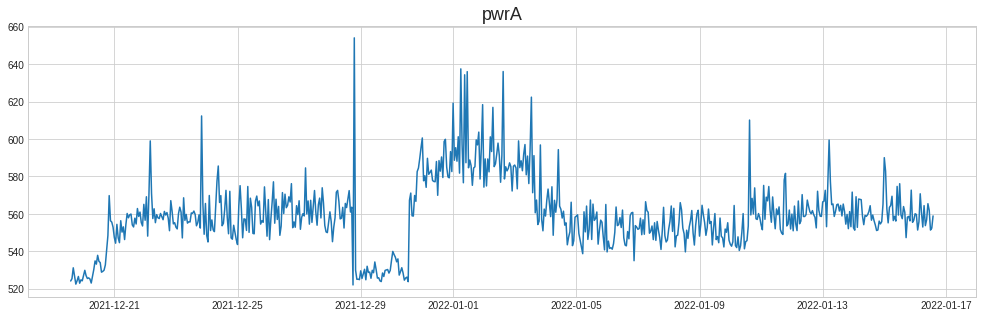

In [15]:
plt.figure(figsize=(17,5))
plt.plot(resampled.index ,resampled['pwrA'])
plt.title('pwrA',fontsize=18)
plt.show()

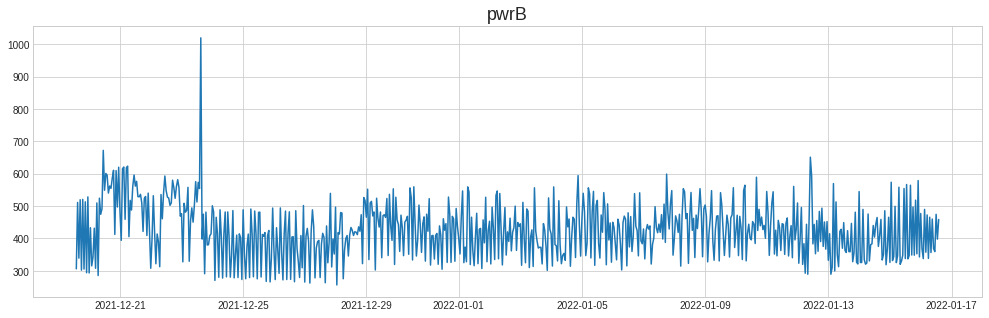

In [16]:
plt.figure(figsize=(17,5))
plt.plot(resampled.index,resampled['pwrB'])
plt.title('pwrB',fontsize=18)
plt.show()

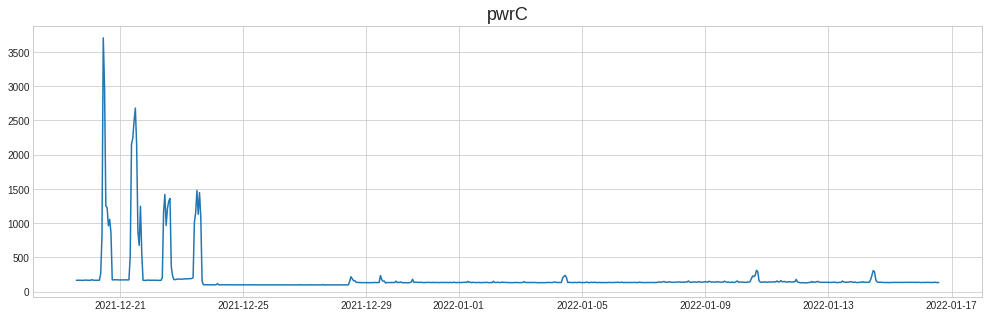

In [17]:
plt.figure(figsize=(17,5))
plt.plot(resampled.index,resampled['pwrC'])
plt.title('pwrC',fontsize=18)
plt.show()

Παρουσίαση δεδομένων μίας μέρας με μεγαλύτερη λεπτομέρεια:

In [18]:
#zoom plots
data_z = resampled[(resampled.index >='2021-12-29 00:00:00.000')&(resampled.index <'2021-12-30 00:00:00.000')].copy()

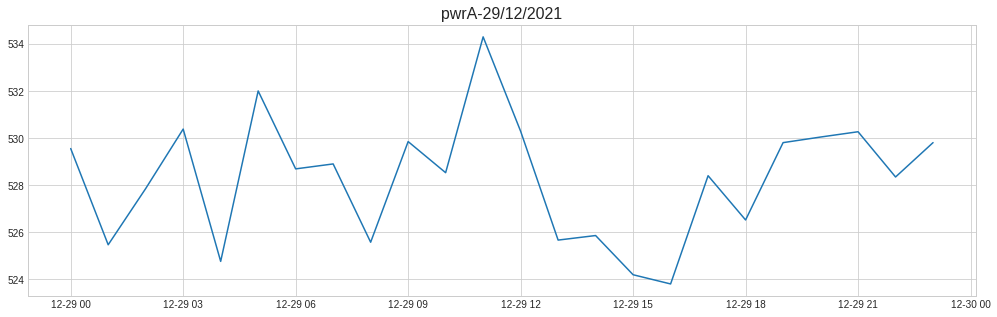

In [19]:
plt.figure(figsize=(17,5))
plt.plot(data_z.index,data_z['pwrA'])
plt.title('pwrA-29/12/2021',fontsize=16)
plt.show()

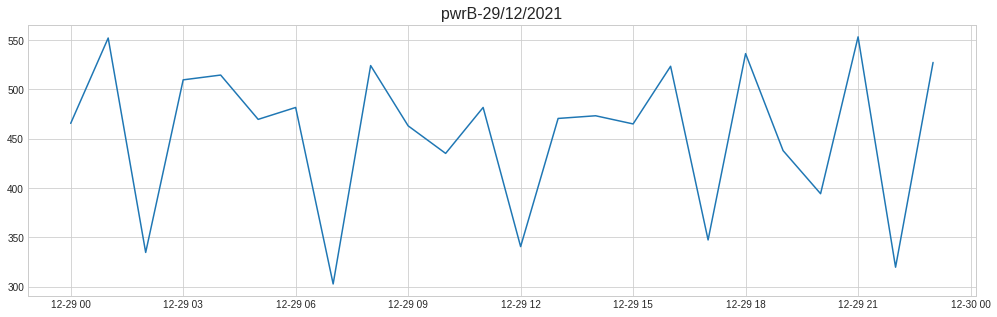

In [20]:
plt.figure(figsize=(17,5))
plt.plot(data_z.index,data_z['pwrB'])
plt.title('pwrB-29/12/2021',fontsize=16)
plt.show()

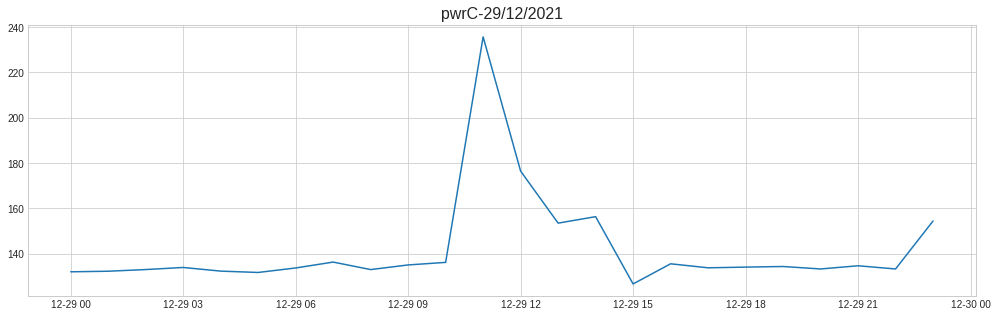

In [21]:
plt.figure(figsize=(17,5))
plt.plot(data_z.index,data_z['pwrC'])
plt.title('pwrC-29/12/2021',fontsize=16)
plt.show()

<h4>Στατιστικά χαρακτηριστικά χρονοσειρών</h4>

In [22]:
resampled.describe()

,pwrA,pwrB,pwrC
count,673.000000,673.000000,673.000000
mean,559.573510,427.163527,196.502991
std,18.538336,86.619908,312.223985
min,522.013589,256.618158,99.257083
25%,550.241851,352.190909,133.269919
50%,558.172702,426.105533,136.343296
75%,566.998713,484.604741,143.561482
max,654.034702,1019.316855,3705.773844


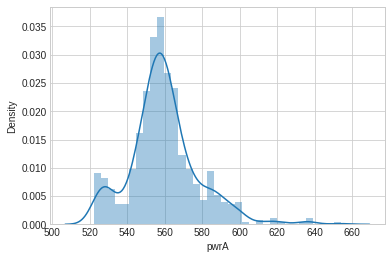

In [23]:
sns.distplot(resampled['pwrA'])

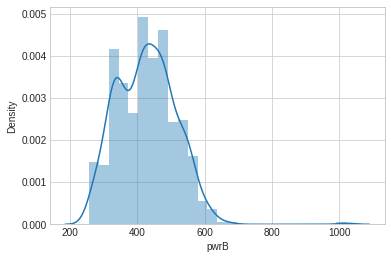

In [24]:
sns.distplot(resampled['pwrB'])

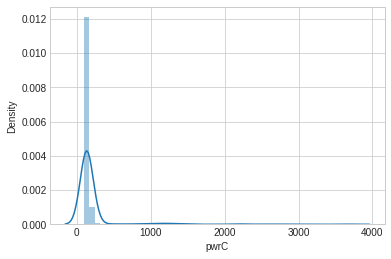

In [25]:
sns.distplot(resampled['pwrC'])

Τα διαγράμματα με συντελεστές αυτοσυσχέτισης και μερικής αυτοσυσχέτισης βρίσκονται στο κομμάτι με τις μεθόδους προβλέψεων.

<h4>Χειρισμός μηδενικών και ακραίων τιμών</h4>

Βλέπουμε πως δεν υπάρχουν μηδεικές ή κενές τιμές

In [26]:
#zeros and nan values
print(len(resampled.index[resampled['pwrA'].isnull()]))
print(len(resampled.index[resampled['pwrB'].isnull()]))
print(len(resampled.index[resampled['pwrC'].isnull()]))
print(len(resampled.index[resampled['pwrA'] == 0.0]))
print(len(resampled.index[resampled['pwrB'] == 0.0]))
print(len(resampled.index[resampled['pwrC'] == 0.0]))

0
0
0
0
0
0


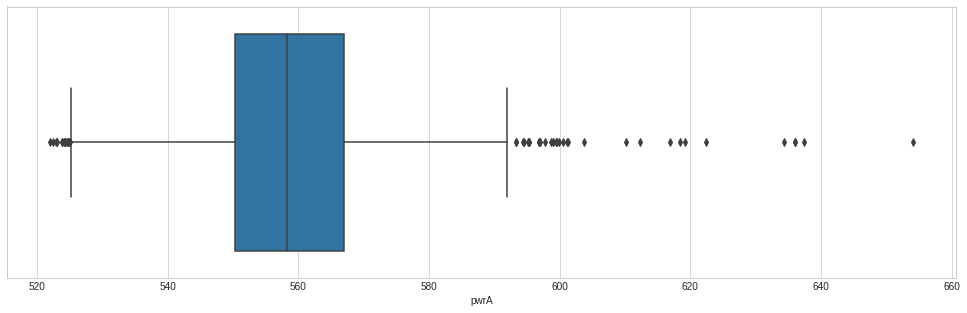

In [27]:
#outliers
#detect outliers
plt.figure(figsize=(17,5))
sns.boxplot(resampled['pwrA'])

In [28]:
print((len(resampled.index[resampled['pwrA'] > 595]) + len(resampled.index[resampled['pwrA'] < 525]))/resampled.shape[0])

0.0638930163447251


In [29]:
#6% των παρατηρήσεων είναι αποδεκτό ποσοστό 
#topping των outliers
resampled['pwrA'].loc[(resampled['pwrA']>595)] = 595
resampled['pwrA'].loc[(resampled['pwrA']<525)] = 525

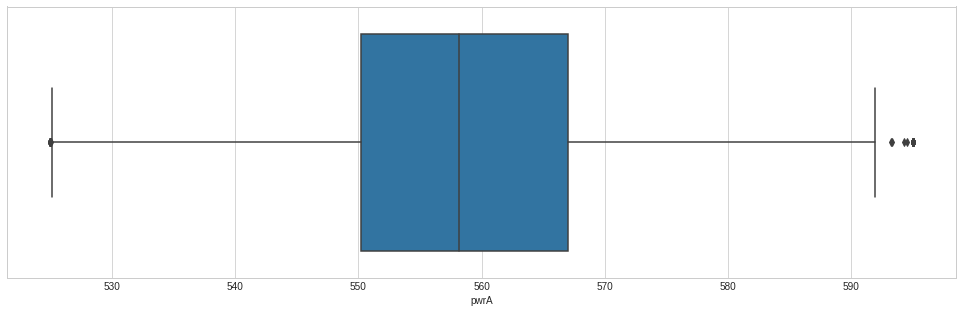

In [30]:
plt.figure(figsize=(17,5))
sns.boxplot(resampled['pwrA'])

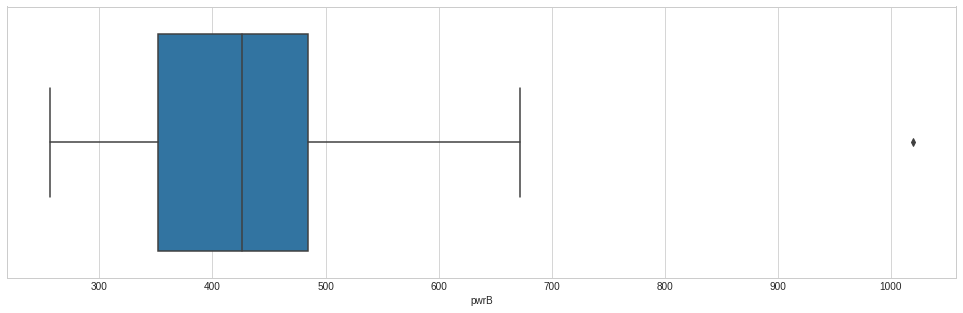

In [31]:
plt.figure(figsize=(17,5))
sns.boxplot(resampled['pwrB'])

In [32]:
print((len(resampled.index[resampled['pwrB'] > 680]) + len(resampled.index[resampled['pwrB'] < 210]))/resampled.shape[0])

0.0014858841010401188


In [33]:
#0.1% των παρατηρήσεων είναι αποδεκτό ποσοστό 
#topping των outliers
resampled['pwrB'].loc[(resampled['pwrB']>680)] = 680
resampled['pwrB'].loc[(resampled['pwrB']<210)] = 210

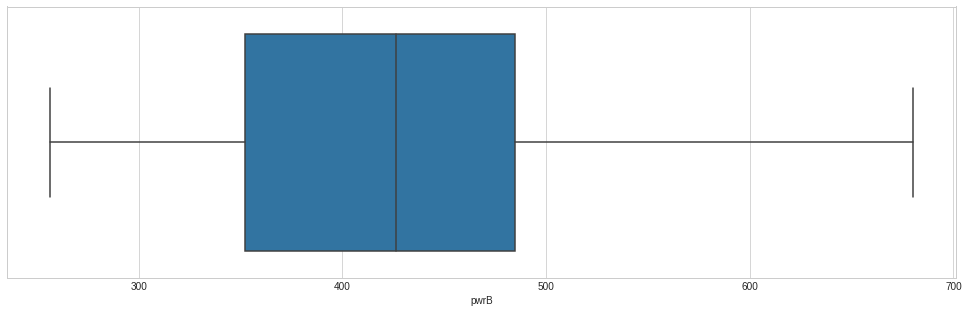

In [34]:
plt.figure(figsize=(17,5))
sns.boxplot(resampled['pwrB'])

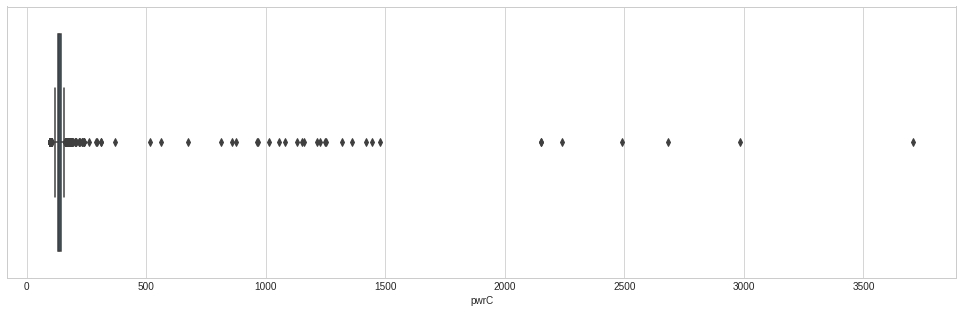

In [35]:
plt.figure(figsize=(17,5))
sns.boxplot(resampled['pwrC'])

In [36]:
print((len(resampled.index[resampled['pwrC'] > 300]) + len(resampled.index[resampled['pwrC'] < 100]))/resampled.shape[0])

0.09361069836552749


In [37]:
#υπερβολικά υψηλό ποσοστό
#θα ακολουθήσουμε άλλη μέθοδο
lower_limit = resampled['pwrC'].quantile(0.001)
upper_limit = resampled['pwrC'].quantile(0.92)
resampled['pwrC'] = resampled['pwrC'].clip(lower=lower_limit,upper=upper_limit)

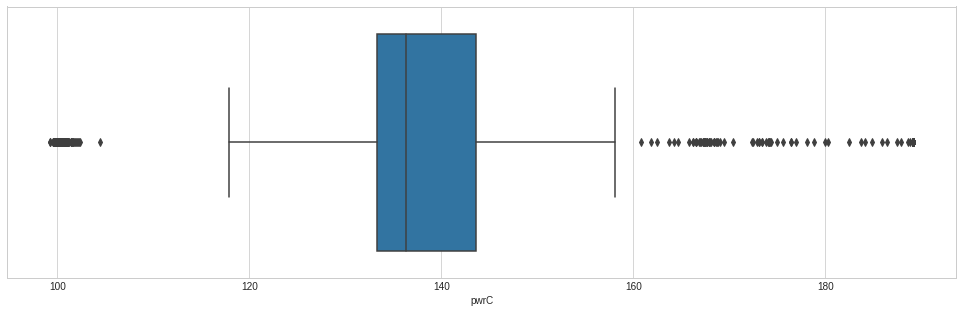

In [38]:
plt.figure(figsize=(17,5))
sns.boxplot(resampled['pwrC'])

<h4>Αποσύνθεση χρονοσειρών</h4>

<Figure size 1224x216 with 0 Axes>

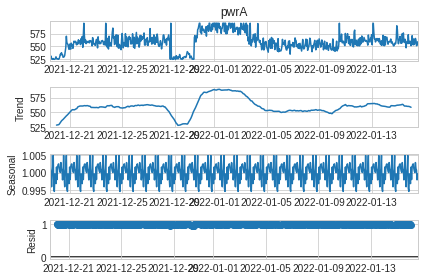

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
rlt = seasonal_decompose(resampled['pwrA'], model='multiplicative');
plt.figure(figsize=(17,3))
rlt.plot()
plt.show()

Η χρονοσειρά pwrA δεν παρουσιάζει εποχιακότητα

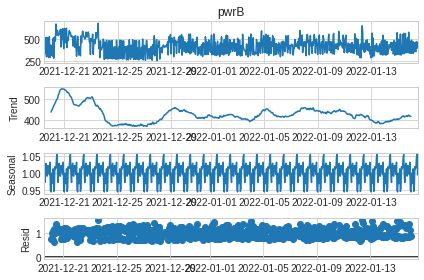

In [40]:
rlt = seasonal_decompose(resampled['pwrB'], model='multiplicative')
rlt.plot()
plt.show()

Πιο έντονη εποχιακότητα παρουσιάζει η pwrB

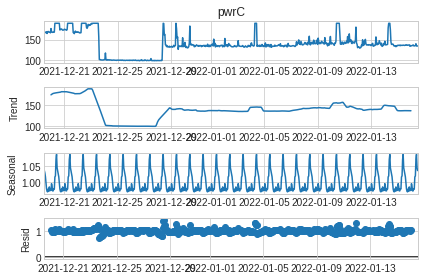

In [41]:
rlt = seasonal_decompose(resampled['pwrC'], model='multiplicative')
rlt.plot()
plt.show()

Ακόμη πιο έντονη εποχιακότητα παρουσιάζει η pwrC

<h4>Έλεγχος στασιμότητας</h4>

In [42]:
from statsmodels.tsa.stattools import adfuller

ts=['pwrA','pwrB','pwrC']
for item in ts:
    print(item)
    result = adfuller(resampled[item], autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'n_lags: {result[2]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critical Values:')
        print(f'  {key},{value}')
    print('--------')

pwrA
ADF Statistic: -3.247570893034115
n_lags: 6
p-value: 0.017391018480531196
Critical Values:
  1%,-3.440206881811471
Critical Values:
  5%,-2.8658894709126246
Critical Values:
  10%,-2.569086242819396
--------
pwrB
ADF Statistic: -4.401803263693688
n_lags: 8
p-value: 0.000294658994461299
Critical Values:
  1%,-3.4402366871734196
Critical Values:
  5%,-2.8659026013871864
Critical Values:
  10%,-2.5690932385868774
--------
pwrC
ADF Statistic: -3.3349226161073933
n_lags: 5
p-value: 0.01338779726704565
Critical Values:
  1%,-3.4401920464204667
Critical Values:
  5%,-2.865882935271461
Critical Values:
  10%,-2.569082760711099
--------


Αν p>0.05 η ΧΣ είναι μη στατική.<br>
prwA -> στατική <br>
pwrB -> στατική <br>
pwrC -> στατική

In [43]:
#KPSS test
from statsmodels.tsa.stattools import kpss

ts=['pwrA','pwrB','pwrC']
for item in ts:
    print(item)
    result = kpss(resampled[item])
    print(f'KPSS Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'n_lags: {result[2]}')
    for key, value in result[3].items():
        print('Critical Values:')
        print(f'  {key},{value}')
    print('--------')

pwrA
KPSS Statistic: 0.27390760059400454
p-value: 0.1
n_lags: 16
Critical Values:
  10%,0.347
Critical Values:
  5%,0.463
Critical Values:
  2.5%,0.574
Critical Values:
  1%,0.739
--------
pwrB
KPSS Statistic: 0.3883471799495226
p-value: 0.0821779396769299
n_lags: 14
Critical Values:
  10%,0.347
Critical Values:
  5%,0.463
Critical Values:
  2.5%,0.574
Critical Values:
  1%,0.739
--------
pwrC
KPSS Statistic: 0.30799792382789354
p-value: 0.1
n_lags: 16
Critical Values:
  10%,0.347
Critical Values:
  5%,0.463
Critical Values:
  2.5%,0.574
Critical Values:
  1%,0.739
--------


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


Αν p > 0.05 η ΧΣ είναι στατική.<br>
prwA -> στατική <br>
pwrB -> στατική <br>
pwrC -> στατική

<h2>ΣΤΑΤΙΣΤΙΚΕΣ ΠΡΟΒΛΕΨΕΙΣ</h2>

#Simple Exponential Smoothing

In [ ]:
!pip install statsmodels==0.13.0

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from sklearn.metrics import mean_squared_error

#linear search to find smoothing level
def get_sl(horizon,pwr):
    model = SimpleExpSmoothing(endog=resampled[pwr][:-horizon], initialization_method='known', initial_level=(resampled[pwr][0]+resampled[pwr][1]+resampled[pwr][2])/3)
    model_fit = model.fit(smoothing_level=0, optimized=False)
    min_err = mean_squared_error(actual_data[pwr][:-horizon], model_fit.fittedvalues)
    min_a = 0
    for a in range(1,101):
        model = SimpleExpSmoothing(resampled[pwr][:-horizon], initialization_method="known", initial_level=(resampled[pwr][0]+resampled[pwr][1]+resampled[pwr][2])/3)
        model_fit = model.fit(smoothing_level=a/100, optimized=False)
        mse = mean_squared_error(actual_data[pwr][:-horizon], model_fit.fittedvalues)
        if (mse <= min_err):
            min_err = mse
            min_a = a/100
    return min_a

In [ ]:
sl_A6,sl_B6,sl_C6 = get_sl(6,'pwrA'),get_sl(6,'pwrB'),get_sl(6,'pwrC')
print(sl_A6,sl_B6,sl_C6)
sl_A24,sl_B24,sl_C24 = get_sl(24,'pwrA'),get_sl(24,'pwrB'),get_sl(24,'pwrC')
print(sl_A24,sl_B24,sl_C24)

0.29 0.09 1.0
0.29 0.09 1.0


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

def SES(pwr,horizon,a):
  model = SimpleExpSmoothing(endog=resampled[pwr][:-horizon], initialization_method='known', initial_level=(resampled[pwr][0]+resampled[pwr][1]+resampled[pwr][2])/3)
  model_fit = model.fit(smoothing_level=a, optimized=False)
  predictions = model_fit.forecast(horizon)
  return (100*mean_absolute_percentage_error(actual_data[pwr][-horizon:], predictions))

print(SES('pwrA',6,sl_A6))
print(SES('pwrA',24,sl_A24))
print(SES('pwrB',6,sl_B6))
print(SES('pwrB',24,sl_B24))
print(SES('pwrC',6,sl_C6))
print(SES('pwrC',24,sl_C24))

0.7672649624272171
1.0784035330884778
10.609309258052601
15.92217458350155
0.8199627452603562
0.7546806091963361


#ACF & PACF#

Οι συντελεστές αυτοσυσχέτισης για τις τρεις χρονοσειρές:

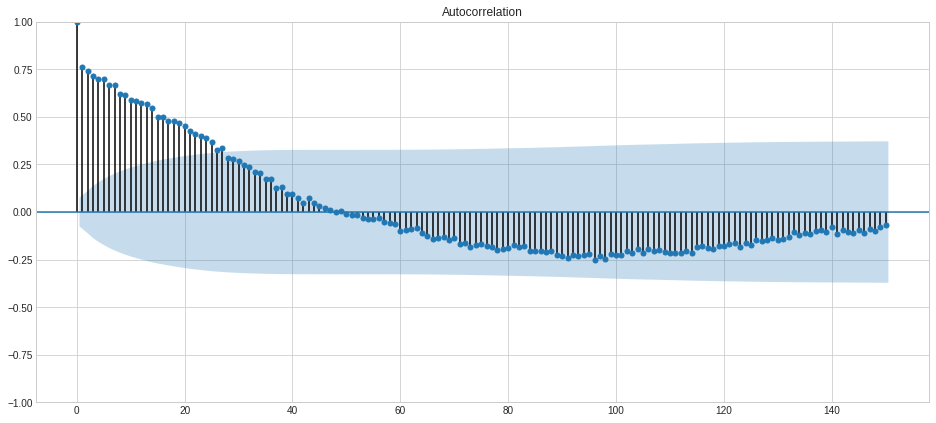

In [44]:
from statsmodels.graphics.tsaplots import plot_acf
plt.figure(figsize=(16,7))
plot_acf(resampled['pwrA'], ax=plt.gca(),lags=150)
plt.show()

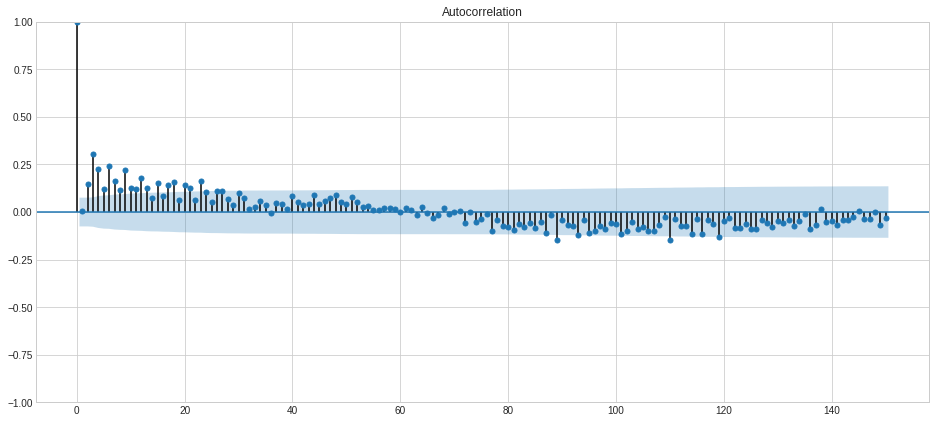

In [45]:
plt.figure(figsize=(16,7))
plot_acf(resampled['pwrB'], ax=plt.gca(),lags=150)
plt.show()

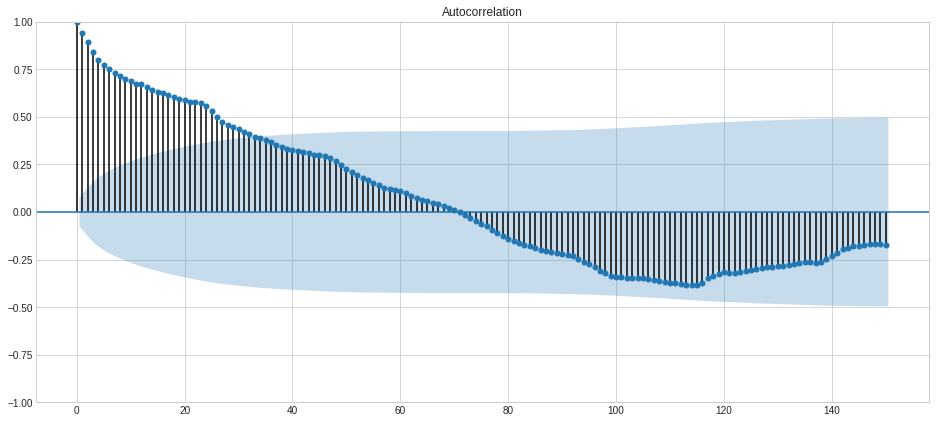

In [46]:
plt.figure(figsize=(16,7))
plot_acf(resampled['pwrC'], ax=plt.gca(),lags=150)
plt.show()

Για την χρονοσειρά pwrA:

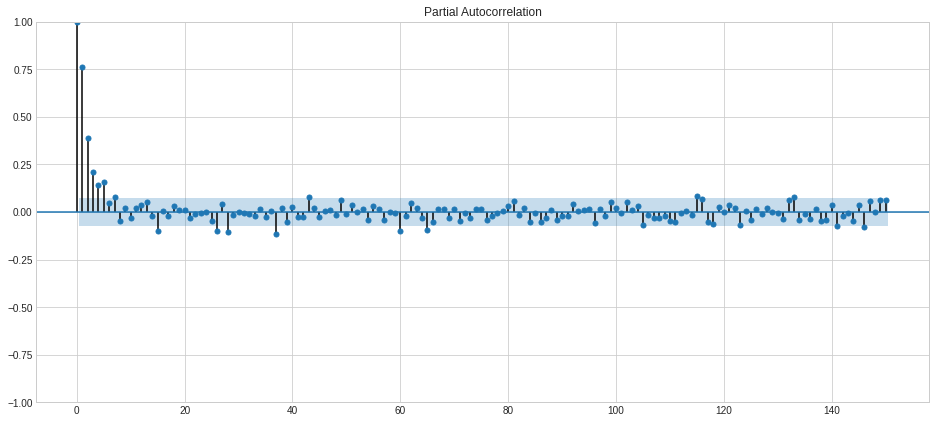

In [47]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(16,7))
plot_pacf(resampled['pwrA'], ax=plt.gca(),lags=150)
plt.show()

Για την χρονοσειρά pwrB:

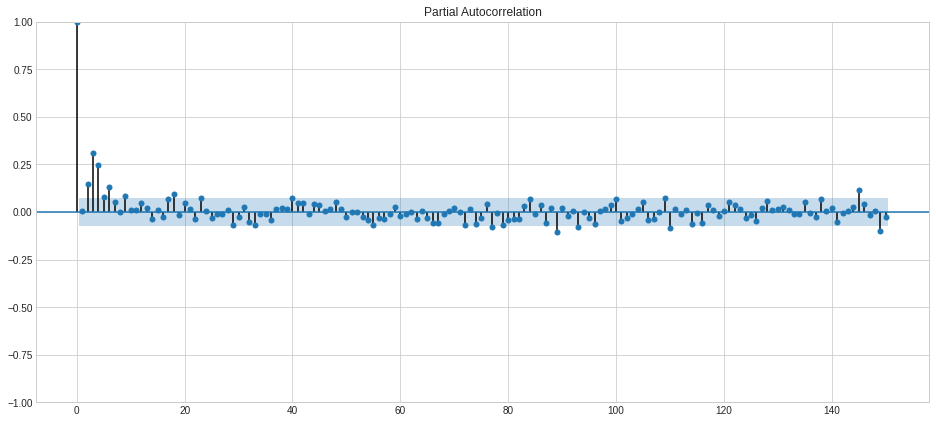

In [48]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(16,7))
plot_pacf(resampled['pwrB'], ax=plt.gca(),lags=150)
plt.show()

Για την χρονοσειρά pwrC:

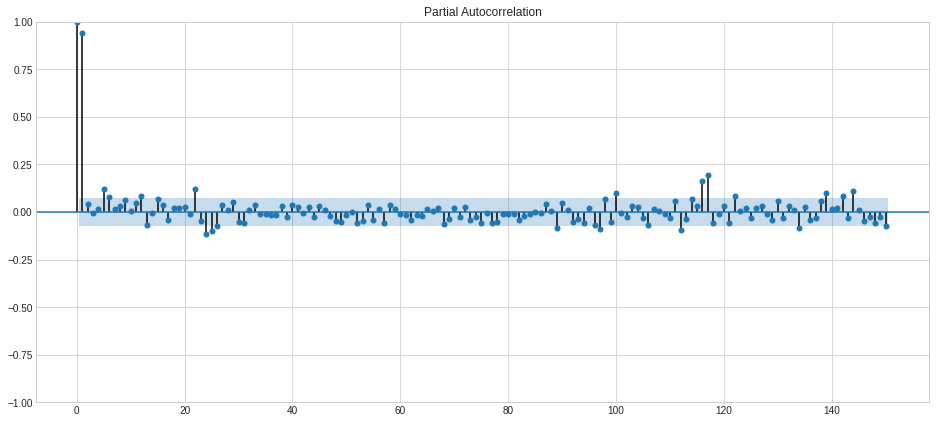

In [49]:
from statsmodels.graphics.tsaplots import plot_pacf
plt.figure(figsize=(16,7))
plot_pacf(resampled['pwrC'], ax=plt.gca(),lags=150)
plt.show()

#ARIMA

#Ορίζοντας 6#

In [ ]:
import pmdarima as pm

horizon = 6
model = pm.auto_arima(resampled['pwrA'][:-horizon],trace=True ,max_p=2*horizon, max_q=2*horizon, max_order=4*horizon, stepwise=False, suppress_warnings=True, seasonal=False)


 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5143.500, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4892.116, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4893.836, Time=0.64 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4895.060, Time=0.78 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4896.802, Time=1.08 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4897.638, Time=1.25 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=4898.736, Time=1.34 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=4900.659, Time=1.74 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=4899.398, Time=2.15 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=4900.968, Time=2.75 sec
 ARIMA(0,1,10)(0,0,0)[0] intercept   : AIC=4902.847, Time=2.68 sec
 ARIMA(0,1,11)(0,0,0)[0] intercept   : AIC=4904.009, Time=3.38 sec
 ARIMA(0,1,12)(0,0,0)[0] intercept   : AIC=4904.577, Time=2.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4982.846, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4893.810, Time=0.22 sec
 ARIMA(

In [ ]:
#oos prediction
test_preds = model.predict(n_periods=horizon, return_conf_int=False)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

print(100*mean_absolute_percentage_error(actual_data['pwrA'][-horizon:],test_preds))

0.8003939507741871


In [ ]:
horizon = 6
model = pm.auto_arima(resampled['pwrB'][:-horizon],trace=True ,max_p=2*horizon, max_q=2*horizon, max_order=4*horizon, stepwise=False, suppress_warnings=True, seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8258.124, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7734.354, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7692.785, Time=0.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=7694.480, Time=0.51 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=7683.418, Time=0.94 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=7683.969, Time=1.31 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=7685.191, Time=1.42 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=7682.836, Time=1.04 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=7684.795, Time=1.85 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=7686.760, Time=2.74 sec
 ARIMA(0,1,10)(0,0,0)[0] intercept   : AIC=7685.648, Time=2.99 sec
 ARIMA(0,1,11)(0,0,0)[0] intercept   : AIC=7687.205, Time=3.76 sec
 ARIMA(0,1,12)(0,0,0)[0] intercept   : AIC=7688.827, Time=3.94 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7998.478, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7702.264, Time=0.64 sec
 ARIMA(

In [ ]:
test_preds = model.predict(n_periods=horizon, return_conf_int=False)

In [ ]:
print(100*mean_absolute_percentage_error(actual_data['pwrB'][-horizon:],test_preds))

8.206969229737366


In [ ]:
test_preds

array([432.81487667, 409.00248734, 399.64474696, 426.77585521,
       401.623715  , 411.40045666])

In [ ]:
horizon = 6
model = pm.auto_arima(resampled['pwrC'][:-horizon],trace=True ,max_p=2*horizon, max_q=2*horizon, max_order=4*horizon, stepwise=False, suppress_warnings=True, seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4698.778, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4697.588, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4699.004, Time=0.22 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4697.672, Time=0.31 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4679.374, Time=0.46 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4676.645, Time=0.63 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=4677.523, Time=0.71 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=4678.173, Time=0.89 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=4679.921, Time=1.15 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=4681.722, Time=1.35 sec
 ARIMA(0,1,10)(0,0,0)[0] intercept   : AIC=4681.572, Time=1.52 sec
 ARIMA(0,1,11)(0,0,0)[0] intercept   : AIC=4681.694, Time=1.94 sec
 ARIMA(0,1,12)(0,0,0)[0] intercept   : AIC=4675.749, Time=2.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4697.732, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4676.863, Time=0.42 sec
 ARIMA(

In [ ]:
test_preds = model.predict(n_periods=horizon, return_conf_int=False)

In [ ]:
print(100*mean_absolute_percentage_error(actual_data['pwrC'][-horizon:],test_preds))

0.8909720455505201


In [ ]:
test_preds

array([134.34981727, 134.42331435, 135.04028774, 134.83643254,
       134.57632517, 134.97220613])

#Ορίζοντας 24#

In [ ]:
import pmdarima as pm

horizon = 24
model = pm.auto_arima(resampled['pwrA'][:-horizon],trace=True ,max_p=20, max_q=20, max_order=36, stepwise=False, suppress_warnings=True, seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5009.968, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4767.640, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4769.334, Time=0.24 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4770.302, Time=0.36 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4771.848, Time=0.44 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4772.732, Time=0.61 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=4773.605, Time=0.61 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=4775.510, Time=0.85 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=4773.966, Time=1.15 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=4775.667, Time=1.29 sec
 ARIMA(0,1,10)(0,0,0)[0] intercept   : AIC=4777.616, Time=1.50 sec
 ARIMA(0,1,11)(0,0,0)[0] intercept   : AIC=4778.651, Time=1.86 sec
 ARIMA(0,1,12)(0,0,0)[0] intercept   : AIC=4779.370, Time=3.27 sec
 ARIMA(0,1,13)(0,0,0)[0] intercept   : AIC=4781.114, Time=2.37 sec
 ARIMA(0,1,14)(0,0,0)[0] intercept   : AIC=4781.551, Time=2.67 sec
 ARIM

In [ ]:
test_preds = model.predict(n_periods=horizon, return_conf_int=False)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

print(100*mean_absolute_percentage_error(actual_data['pwrA'][-horizon:],test_preds))

1.1485913328890809


In [ ]:
test_preds

array([561.6647996 , 562.77223436, 562.65512003, 562.53017942,
       563.14182354, 562.34774775, 563.44083388, 562.40464596,
       563.4745232 , 562.71945958, 563.28917353, 563.18822986,
       563.03272239, 563.63793877, 562.88161976, 563.91040494,
       562.95668866, 563.93634577, 563.26805262, 563.76502952,
       563.71410746, 563.53704166, 564.13319436, 563.4149271 ])

In [ ]:
horizon = 24
model = pm.auto_arima(resampled['pwrC'][:-horizon],trace=True ,max_p=20, max_q=20, max_order=36, stepwise=False, suppress_warnings=True, seasonal=False)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4589.246, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4588.168, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4589.597, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4588.370, Time=0.38 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=4570.612, Time=0.57 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=4568.008, Time=0.70 sec
 ARIMA(0,1,6)(0,0,0)[0] intercept   : AIC=4568.920, Time=0.78 sec
 ARIMA(0,1,7)(0,0,0)[0] intercept   : AIC=4569.602, Time=1.06 sec
 ARIMA(0,1,8)(0,0,0)[0] intercept   : AIC=4571.359, Time=1.27 sec
 ARIMA(0,1,9)(0,0,0)[0] intercept   : AIC=4573.164, Time=1.48 sec
 ARIMA(0,1,10)(0,0,0)[0] intercept   : AIC=4573.080, Time=1.77 sec
 ARIMA(0,1,11)(0,0,0)[0] intercept   : AIC=4573.245, Time=2.09 sec
 ARIMA(0,1,12)(0,0,0)[0] intercept   : AIC=4567.494, Time=4.65 sec
 ARIMA(0,1,13)(0,0,0)[0] intercept   : AIC=4569.464, Time=6.12 sec
 ARIMA(0,1,14)(0,0,0)[0] intercept   : AIC=4571.127, Time=2.93 sec
 ARIM

In [ ]:
test_preds = model.predict(n_periods=horizon, return_conf_int=False)

In [ ]:
print(100*mean_absolute_percentage_error(actual_data['pwrC'][-horizon:],test_preds))

0.7284395545596783


In [ ]:
test_preds

array([136.69451503, 135.99669793, 136.00061597, 136.83037068,
       136.49506561, 136.07711178, 136.6377057 , 136.64652928,
       136.12437179, 136.36233536, 136.58306039, 136.15921357,
       136.12393506, 136.39770032, 136.15493198, 135.95378628,
       136.16282227, 136.09168365, 135.83834755, 135.92932086,
       135.96965118, 135.74814897, 135.72446606, 135.80481635])